In [8]:
import numpy as np
import mcbe
from tqdm import tqdm
import matplotlib.pyplot as plt
import scipy
import pandas as pd
import random
from ipywidgets import interact
from mpl_toolkits.mplot3d import Axes3D
from IPython.display import display, clear_output

In [41]:
s_design = np.array(pd.read_csv("N032_M540_Tetra.txt",sep=" ",header=None))

In [42]:
phi = (1+np.sqrt(5))/2
ico = np.array([[0,1,phi],[0,1,-phi],[0,-1,phi],[0,-1,-phi],
                [1,phi,0],[-1,phi,0],[1,-phi,0],[-1,-phi,0],
                [phi,0,1],[phi,0,-1],[-phi,0,1],[-phi,0,-1]])/(np.sqrt(1+phi**2))

In [43]:
polytope = ico
d = polytope.shape[1]

In [44]:
color_dict = {}
colors = []

In [45]:
for point in tqdm(s_design):
    
    corr_x_vert = [np.dot(point, i) for i in polytope]
    
    #find subframes
    subframe = str(tuple(np.sort(np.argsort(corr_x_vert)[-d:])))
    
    if subframe in color_dict.keys():
        colors.append(color_dict[subframe])
        
    else:
        # Generate random hexadecimal color code
        red = random.randint(0, 255)
        green = random.randint(0, 255)
        blue = random.randint(0, 255)

        color_code = f"#{red:02x}{green:02x}{blue:02x}"
        
        color_dict[subframe] = color_code
        colors.append(color_code)
        


100%|██████████| 540/540 [00:00<00:00, 33840.19it/s]


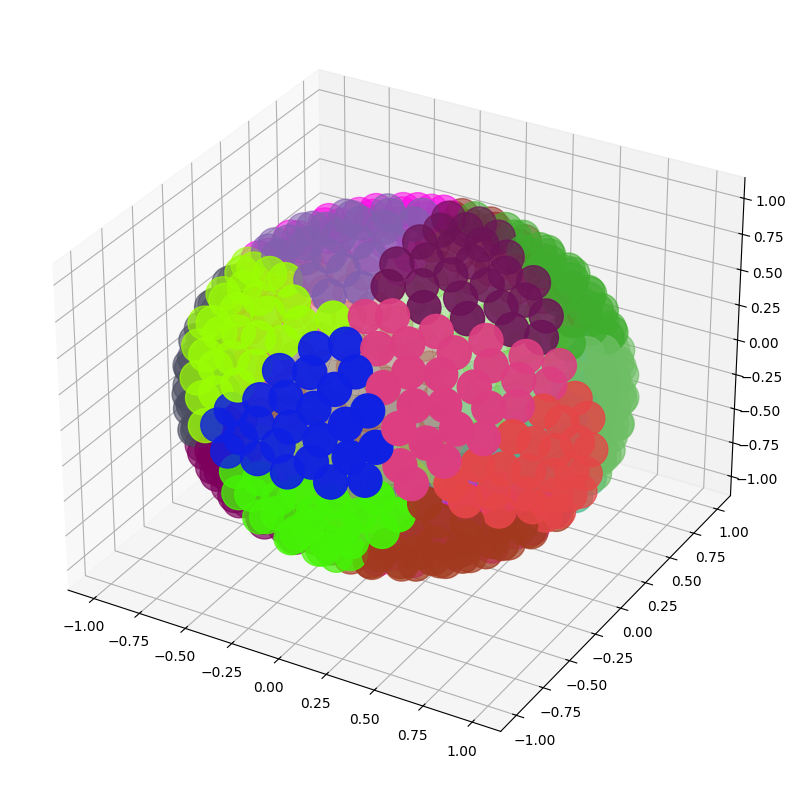

In [46]:

fig = plt.figure(figsize=(10, 10))

r = 0.05
u, v = np.mgrid[0:2 * np.pi:30j, 0:np.pi:20j]
x = np.cos(u) * np.sin(v) *0.99
y = np.sin(u) * np.sin(v)*0.99
z = np.cos(v)*0.99

ax = fig.add_subplot(projection='3d')
ax.plot_surface(x, y, z, cmap = plt.cm.bone, alpha=1)
ax.scatter(s_design[:,0],s_design[:,1],s_design[:,2],color=colors,s=600)


In [52]:
ran = mcbe.get_points(distribution="ball",num_points=12,d=3)

In [53]:
polytope = ran

In [54]:
color_dict = {}
colors = []

In [55]:
for point in tqdm(s_design):
    
    corr_x_vert = [np.dot(point, i) for i in polytope]
    
    #find subframes
    subframe = str(tuple(np.sort(np.argsort(corr_x_vert)[-d:])))
    
    if subframe in color_dict.keys():
        colors.append(color_dict[subframe])
        
    else:
        # Generate random hexadecimal color code
        red = random.randint(0, 255)
        green = random.randint(0, 255)
        blue = random.randint(0, 255)

        color_code = f"#{red:02x}{green:02x}{blue:02x}"
        
        color_dict[subframe] = color_code
        colors.append(color_code)

100%|██████████| 540/540 [00:00<00:00, 30081.87it/s]


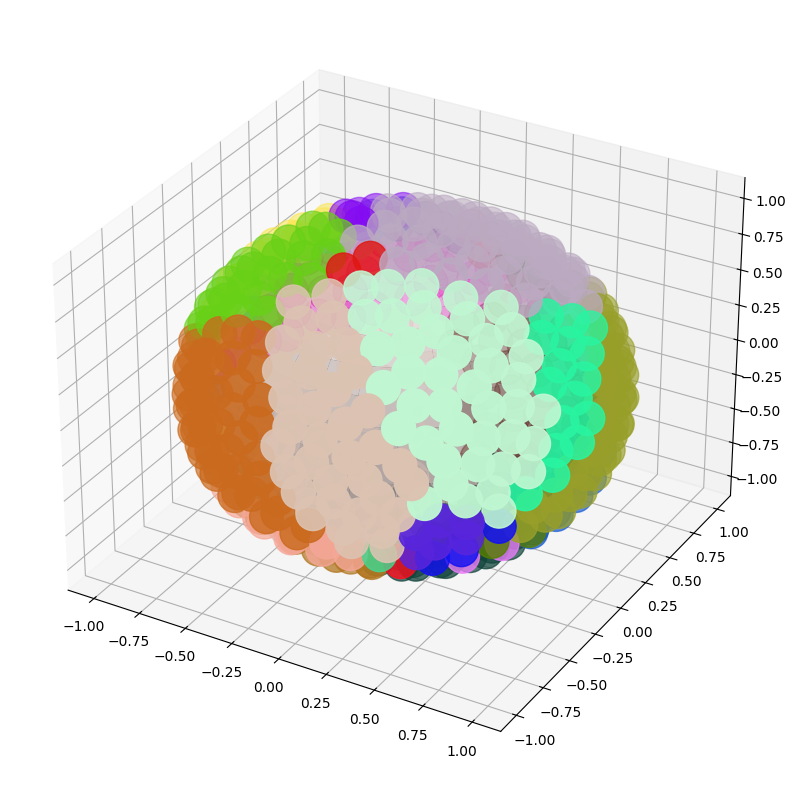

In [56]:

fig = plt.figure(figsize=(10, 10))

r = 0.05
u, v = np.mgrid[0:2 * np.pi:30j, 0:np.pi:20j]
x = np.cos(u) * np.sin(v) *0.99
y = np.sin(u) * np.sin(v)*0.99
z = np.cos(v)*0.99

ax = fig.add_subplot(projection='3d')
ax.plot_surface(x, y, z, cmap=plt.cm.gray, alpha=1.0)
ax.scatter(s_design[:,0],s_design[:,1],s_design[:,2],color=colors,s=600)

plt.show()